In [1]:

import numpy as np

def initialize_membership_matrix(num_samples, num_clusters):
    # Initialize the membership matrix randomly
    membership_mat = np.random.rand(num_clusters, num_samples)
    # Normalize the membership matrix
    membership_mat /= np.sum(membership_mat, axis=0)
    return membership_mat

def calculate_centroids(data, membership_mat, num_clusters, fuzziness):
    # Calculate centroids
    centroids = np.zeros((num_clusters, data.shape[1]))
    for k in range(num_clusters):
        # Compute the denominator
        denominator = np.sum((membership_mat[k, :] ** fuzziness))
        for j in range(data.shape[1]):
            # Compute the numerator
            numerator = np.sum((membership_mat[k, :] ** fuzziness) * data[:, j])
            centroids[k, j] = numerator / denominator
    return centroids

def update_membership_matrix_(data, centroids, num_clusters, fuzziness):
    # Update the membership matrix
    num_samples = data.shape[0]
    membership_mat = np.zeros((num_clusters, num_samples))
    for i in range(num_samples):
        for k in range(num_clusters):
            # Compute the distance between the sample and the centroid
            distances = np.linalg.norm(data[i] - centroids[k])
            # Avoid division by zero
            if distances == 0:
                membership_mat[k, i] = 1
            else:
                membership_mat[k, i] = 1 / np.sum((distances / np.linalg.norm(data[i] - centroids)) ** (2 / (fuzziness - 1)))
    # Normalize the membership matrix
    membership_mat /= np.sum(membership_mat, axis=0)
    return membership_mat

def fuzzy_c_means_clustering(data, num_clusters, fuzziness=2, max_iter=100, error=1e-6, random_state=None):
    np.random.seed(random_state)
    num_samples = data.shape[0]
    # Initialize membership matrix
    membership_mat = initialize_membership_matrix(num_samples, num_clusters)
    # Initialize centroids
    centroids = calculate_centroids(data, membership_mat, num_clusters, fuzziness)

    for _ in range(max_iter):
        # Keep the old centroids to check convergence
        old_centroids = centroids.copy()
        # Update membership matrix
        membership_mat = update_membership_matrix_(data, centroids, num_clusters, fuzziness)
        # Update centroids
        centroids = calculate_centroids(data, membership_mat, num_clusters, fuzziness)
        # Check convergence
        if np.linalg.norm(centroids - old_centroids) < error:
            break

    return centroids, membership_mat


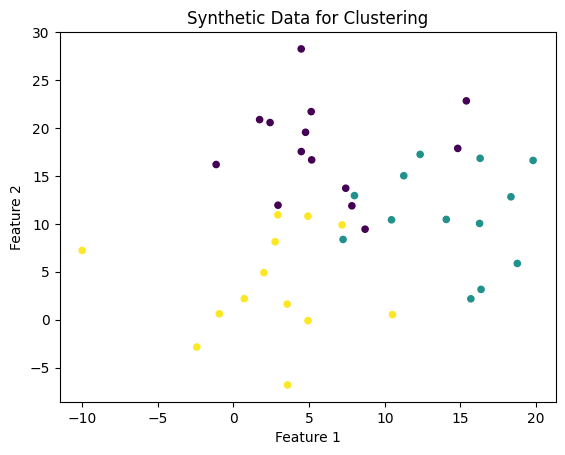

Normalized Mutual Information (NMI): 0.5357567269997707


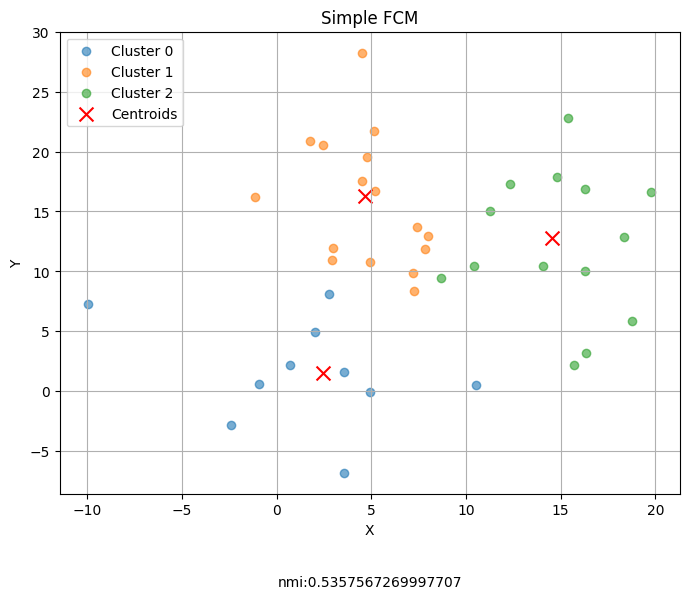

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score



num_clusters=3
num_samples = 40

# Generate synthetic data with clusters
X, y = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=5, random_state=42)
X += 10



# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20)
plt.title('Synthetic Data for Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


centroids, membership_mat = fuzzy_c_means_clustering(X, num_clusters, max_iter=20)


max_membership_cluster = np.argmax(membership_mat, axis=0)
# Plot data points with colors based on their corresponding centroids
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = X[max_membership_cluster == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Simple FCM')
plt.xlabel('X')
plt.ylabel('Y')
# Assuming 'y' contains the true cluster labels and 'max_membership_cluster' contains the cluster labels assigned by your fuzzy clustering algorithm
nmi = normalized_mutual_info_score(y, max_membership_cluster)
print("Normalized Mutual Information (NMI):", nmi)

plt.text(0.5, -0.2, f'nmi:{nmi}', ha='center', transform=plt.gca().transAxes)

plt.legend()
plt.grid(True)
plt.show()